In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import pandas as pd
import seaborn as sns
from urllib.request import urlretrieve
from ucimlrepo import fetch_ucirepo 

# SVM Examples:

## SVM 1

In [3]:
# Input data - [X coordinate, Y coordinate]
X = np.array([[1.6,0.3], [1.8,0.5], [2.0,0.7], [2.2,0.4], [2.4,0.6], [2.3,0.5], [2.1,0.5],
              [1.7,1.7], [2.5,1.0], [1.0,3.0], [2.0,1.5], [1.5,1.5], [1.5,2.0], [1.0,2.5],
              [1.6,1.6], [2.4,0.9], [0.9,2.9], [1.9,1.4], [1.0,1.4], [1.4,1.9], [0.9,2.4],
              [1.5,1.7], [2.3,1.1], [0.4,1.0], [1.0,0.7], [1.2,1.5], [1.2,1.0], [1.0,1.1],
              [1.0,1.7], [1.3,1.1], [0.7,1.0], [0.4,0.7], [0.2,1.5], [0.2,1.0], [0.4,1.1],
              [1.0,0.5], [1.3,0.1], [0.7,0.3], [0.4,0.4], [0.2,0.5], [0.2,0.1], [0.4,0.1],
              [1.0,2.4], [1.3,2.1], [0.7,2.0], [0.4,2.7], [0.2,2.5], [0.2,2.0], [0.4,2.1],
              [3.4,2.0], [3.5,2.1], [3.6,2.3], [3.4,2.4], [3.5,2.5], [3.1,2.6], [3.3,2.7],
              [2.0,3.1], [3.5,1.0], [4.0,1.5], [3.0,3.0], [3.0,2.0], [2.5,2.5], [3.3,1.5],
              [3.9,2.5], [3.9,2.0], [3.8,3.0], [3.8,2.9], [3.9,2.7], [3.9,2.5], [3.9,2.7],
              [2.1,3.1], [3.6,1.1], [3.8,1.7], [3.2,3.1], [2.9,2.1], [2.6,2.4], [3.2,1.4],
              [4.0,0.1], [3.9,0.2], [3.9,0.3], [3.7,0.5], [3.9,0.7], [3.9,0.4], [3.7,0.4]])

# Labels (1 or -1)
Y = np.array([-1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1,
              1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1])

# Basic gradient descent
def train_svm(X, Y, epochs=10000):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    learning_rate = 1
    
    # See the change
    w0_per_epoch = [] 
    w1_per_epoch = []
    
    # Training
    print("starts training")
    for epoch in range(1, epochs):
        error = 0
        for i, x in enumerate(X):
            # It there is an error
            if (Y[i] * np.dot(X[i], w)) < 1:
                w = w + learning_rate * ((X[i] * Y[i]) + (-2 * (1/epochs) * w))
            else:
                w = w + learning_rate * (-2 * (1/epochs) * w)
                
        w0_per_epoch.append(w[0])
        w1_per_epoch.append(w[1])
    
    return w, w0_per_epoch, w1_per_epoch

w, w0array, w1array = train_svm(X, Y, epochs=10000)
print(w)
# plotting in code - w[0](intercept)*0.65 for some reason?

starts training
[3.36748683 2.10292688]


## SVM 2

In [28]:
np.random.seed(6)
from sklearn.datasets import make_blobs


(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
X1 = np.c_[np.ones((X.shape[0])),X] #we need to add 1 to X values (we can say its bias) X1 = [B, w1, w2]

# np.c_ is the numpy concatenate function along second axis
# np.c_[np.array([1,2,3]), np.array([4,5,6])]
# = array([[1, 4],
#         [2, 5],
#         [3, 6]])

# splitting into positive and negative classes
postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==0:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])

# our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)} 

In [29]:
#all the required variables 
w=[] # weights (2D vector)
b=[] # bias

max_feature_value=float('-inf')
min_feature_value=float('+inf')
for yi in data_dict:
    if np.amax(data_dict[yi])>max_feature_value: # amax = Return the maximum of an array or maximum along an axis.
        max_feature_value=np.amax(data_dict[yi])
                
    if np.amin(data_dict[yi])<min_feature_value:
        min_feature_value=np.amin(data_dict[yi])
        
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001]

In [30]:
def SVM_Training(data_dict):
    i=1
    global w
    global b
    # {||w||: [w,b]}
    length_Wvector = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value * 0.5

    for lrate in learning_rate:
        w = np.array([w_optimum,w_optimum])     
        optimized = False
        while not optimized:
            #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
            for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
                for transformation in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                    w_t = w*transformation
                    
                    correctly_classified = True
                    # every data point should be correct
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:  # we want  yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                                correctly_classified = False
                                
                    if correctly_classified:
                        length_Wvector[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude
            
            if w[0] < 0:
                optimized = True
            else:
                w = w - lrate

        norms = sorted([n for n in length_Wvector])
        
        minimum_wlength = length_Wvector[norms[0]]
        w = minimum_wlength[0]
        b = minimum_wlength[1]
        
        w_optimum = w[0]+lrate*2

SVM_Training(data_dict)

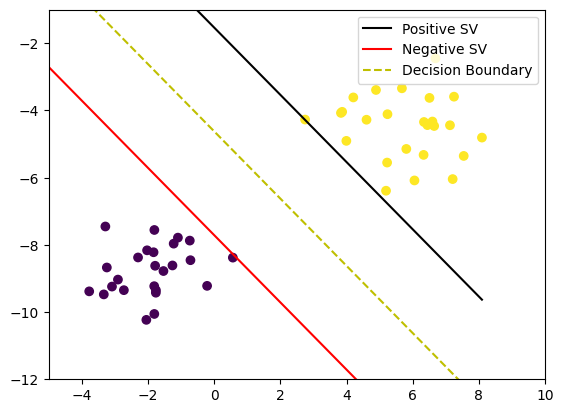

In [42]:
#[[ax.scatter(x[0],x[1],s=100,color=colors[i]) for x in data_dict[i]] for i in data_dict]
colors = {1:'r',-1:'b'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)

# hyperplane = x.w+b
# v = x.w+b
# psv = 1
# nsv = -1
# dec = 0
def hyperplane_value(x,w,b,v):
    return (-w[0]*x-b+v) / w[1]

datarange = (min_feature_value*0.9, max_feature_value*1.)
hyp_x_min = datarange[0]
hyp_x_max = datarange[1]

# (w.x+b) = 1
# positive support vector hyperplane
psv1 = hyperplane_value(hyp_x_min, w, b, 1)
psv2 = hyperplane_value(hyp_x_max, w, b, 1)
ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k', label='Positive SV')

# (w.x+b) = -1
# negative support vector hyperplane
nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'r', label='Negative SV')

# (w.x+b) = 0
# positive support vector hyperplane
db1 = hyperplane_value(hyp_x_min, w, b, 0)
db2 = hyperplane_value(hyp_x_max, w, b, 0)
ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--', label='Decision Boundary')

plt.axis([-5,10,-12,-1])
plt.legend()

In [17]:
def predict(features):
        # sign( x.w+b )
        dot_result = np.sign(np.dot(np.array(features),w)+b)
        return dot_result.astype(int)
    
for i in X[:5]:
    print(predict(i),end=',  ')

l=[]
for xi in X:
    l.append(predict(xi[:6]))
l=np.array(l).astype(int)
l
print(l)

for i, v in enumerate(y):
    if v==0:
        y[i]=-1
error = sum((l-y)**2)
print(error)

1,  1,  -1,  1,  -1,  [ 1  1 -1  1 -1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1  1
  1 -1]
0


## Pytorch SGD with my loss function

In [111]:
batch_size = 64

#Hyper-parameters 
input_size = 784  #(dimension of image 28 * 28)
num_classes = 1   #(just -1 and 1 image)
num_epochs = 10  # number of times you will iterate through the full training data
learning_rate = 0.0001 ## step size used by SGD 
momentum = 0.0 ## Momentum is a moving average of our gradients (helps to keep direction)


import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import datasets, transforms, utils
from torch.utils.data.sampler import SubsetRandomSampler
from torch.nn import functional as F

## USE THIS SNIPPET TO GET BINARY TRAIN/TEST DATA
train_data = datasets.MNIST('./data/anupam-data/pytorch/data/', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
test_data = datasets.MNIST('./data/anupam-data/pytorch/data/', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

subset_indices = ((train_data.train_labels == 0) + (train_data.train_labels == 1)).nonzero().view(-1)

train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=batch_size, 
                                           shuffle=False,
                                           sampler=SubsetRandomSampler(subset_indices))

subset_indices = ((test_data.test_labels == 0) + (test_data.test_labels == 1)).nonzero().view(-1)

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=batch_size,
                                          shuffle=False,
                                          sampler=SubsetRandomSampler(subset_indices))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
# Displaying some sample images in train_loader with its ground truth
samples = enumerate(train_loader)
batch_idx, (sample_data, sample_targets) = next(samples)
print(sample_data.shape)

fig = plt.figure()
for i in range(6):
   plt.subplot(2,3,i+1)
   plt.tight_layout()
   plt.imshow(sample_data[i][0], cmap='gray', interpolation='none')
   plt.title("Ground Truth: {}".format(sample_targets[i]))
   plt.xticks([])
   plt.yticks([]) 
   fig   


total_step = len(train_loader)
print(total_step)

In [110]:
alphas = np.arange(-1,1,0.5)
deltas = np.arange(-1,1,0.5)
for alpha in alphas:
    for delta in deltas:
        class SVM_Loss(nn.modules.Module):    
            def __init__(self):
                super(SVM_Loss,self).__init__()
            def forward(self, outputs, labels):
                # 1/n * sum(loss function)
                # clamp compresses outputs to a range of [0,1]
                return torch.sum(torch.clamp(1 - outputs.t()*labels + delta * torch.exp(-alpha * torch.abs(outputs.t())), min=0))/batch_size

        print(f'alpha: {alpha}, delta: {delta}')

        svm_model = nn.Linear(input_size,num_classes)
        svm_loss_criteria = SVM_Loss()
        # svm_optimizer = torch.optim.LBFGS(svm_model.parameters(), lr=learning_rate, max_iter=20, tolerance_change=1e-09, line_search_fn= 'strong_wolfe') # ls = None
        svm_optimizer = torch.optim.SGD(svm_model.parameters(), lr=learning_rate, momentum=momentum)
        # svm_optimizer iterates over all parameters that were passed to it during its initialization 
        # and updates their values based on the optimization algorithm (in this case, stochastic gradient descent).


        total_step = len(train_loader)
        for epoch in range(num_epochs):
            avg_loss_epoch = 0
            batch_loss = 0
            total_batches = 0
            for i, (images, labels) in enumerate(train_loader):
                # Reshape images to (batch_size, input_size)
                images = images.reshape(-1, 28*28)                      
                labels = Variable(2*(labels.float()-0.5)) # converting labels to 1,-1
                        
                # Forward pass        
                outputs = svm_model(images)           
                loss_svm = svm_loss_criteria(outputs, labels) # computing the loss
                
                # Backward and optimize
                # svm_optimizer.step(closure)
                svm_optimizer.zero_grad() # zeroing the gradients from the previous epoch
                loss_svm.backward() #  computes the gradients of the SVM loss function wrt parameters
                svm_optimizer.step() #  updates the parameters of the SVM model using the computed gradients.

                # print("Model's parameter after the update:")
                # for param2 in svm_model.parameters():
                #   print(param2)
                # total_batches += 1     
                # batch_loss += loss_svm.item()

            # loss per epoch
            avg_loss_epoch = batch_loss/total_batches
            print ('Epoch [{}/{}], Averge Loss:for epoch[{}, {:.4f}]' 
                        .format(epoch+1, num_epochs, epoch+1, avg_loss_epoch ))
                

        # Test the SVM Model
        correct = 0.
        total = 0.
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28)
            
            outputs = svm_model(images)    
            predicted = outputs.data >= 0
            total += labels.size(0) 
            correct += (predicted.view(-1).long() == labels).sum()    
        
        print('Accuracy of the model on the test set: %f %%' % (100 * (correct.float() / total)))
        print("the learning rate is ", learning_rate, " and the momentum is", momentum)

alpha: -1.0, delta: -1.0
Accuracy of the model on the test set: 79.479904 %
the learning rate is  0.0001  and the momentum is 0.0
alpha: -1.0, delta: -0.5
Accuracy of the model on the test set: 46.335697 %
the learning rate is  0.0001  and the momentum is 0.0
alpha: -1.0, delta: 0.0
Accuracy of the model on the test set: 46.335697 %
the learning rate is  0.0001  and the momentum is 0.0
alpha: -1.0, delta: 0.5
Accuracy of the model on the test set: 99.479904 %
the learning rate is  0.0001  and the momentum is 0.0
alpha: -0.5, delta: -1.0
Accuracy of the model on the test set: 46.335697 %
the learning rate is  0.0001  and the momentum is 0.0
alpha: -0.5, delta: -0.5
Accuracy of the model on the test set: 99.905434 %
the learning rate is  0.0001  and the momentum is 0.0
alpha: -0.5, delta: 0.0
Accuracy of the model on the test set: 99.952721 %
the learning rate is  0.0001  and the momentum is 0.0
alpha: -0.5, delta: 0.5
Accuracy of the model on the test set: 99.432625 %
the learning rate 

## Iris Pytorch

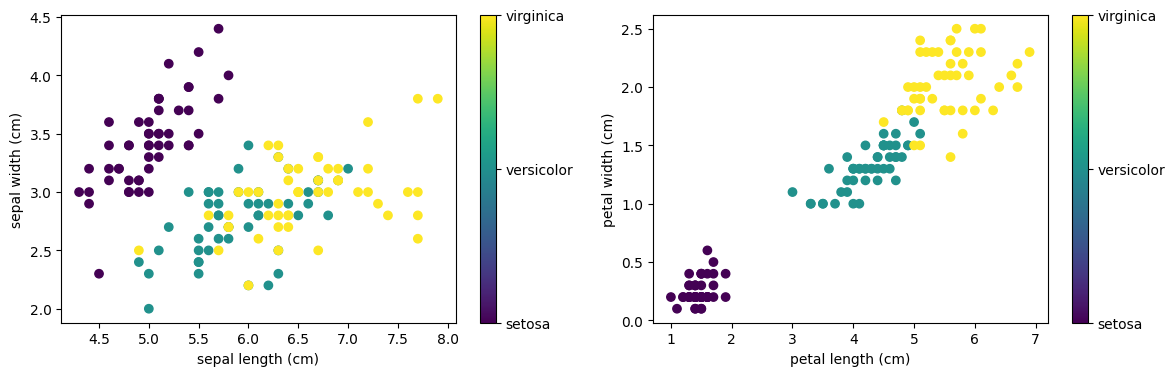

In [18]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

def plot(x_index, y_index):
    formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
    plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris.feature_names[x_index])
    plt.ylabel(iris.feature_names[y_index])

iris = load_iris()
plt.figure(figsize=(14, 4))
plt.subplot(121)
plot(0, 1)
plt.subplot(122)
plot(2, 3)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from random import random, shuffle
import numpy as np
import torch

X = [[x[2], x[3]] for x in iris.data]
y = iris.target.copy()
for i in range(len(y)):
    if y[i] == 0: y[i] = 1
    else: y[i] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dim = len(X[0])
w = torch.autograd.Variable(torch.rand(dim), requires_grad=True)
b = torch.autograd.Variable(torch.rand(1),   requires_grad=True)

step_size = 1e-3
num_epochs = 1000
minibatch_size = 20

for epoch in range(num_epochs):
    inds = [i for i in range(len(X_train))]
    shuffle(inds)
    for i in range(len(inds)):
        L = max(0, 1 - y_train[inds[i]] * (torch.dot(w, torch.Tensor(X_train[inds[i]])) - b))**2
        if L != 0: # if the loss is zero, Pytorch leaves the variables as a float 0.0, so we can't call backward() on it
            L.backward()
            w.data -= step_size * w.grad.data # step
            b.data -= step_size * b.grad.data # step
            w.grad.data.zero_()
            b.grad.data.zero_()

print('plane equation:  w=', w.detach().numpy(), 'b =', b.detach().numpy()[0])

def accuracy(X, y):
    correct = 0
    for i in range(len(y)):
        y_predicted = int(np.sign((torch.dot(w, torch.Tensor(X[i])) - b).detach().numpy()[0]))
        if y_predicted == y[i]: correct += 1
    return float(correct)/len(y)

print('train accuracy', accuracy(X_train, y_train))
print('test accuracy', accuracy(X_test, y_test))

plane equation:  w= [-0.77573377 -1.0204476 ] b = -2.6289988
train accuracy 1.0
test accuracy 1.0


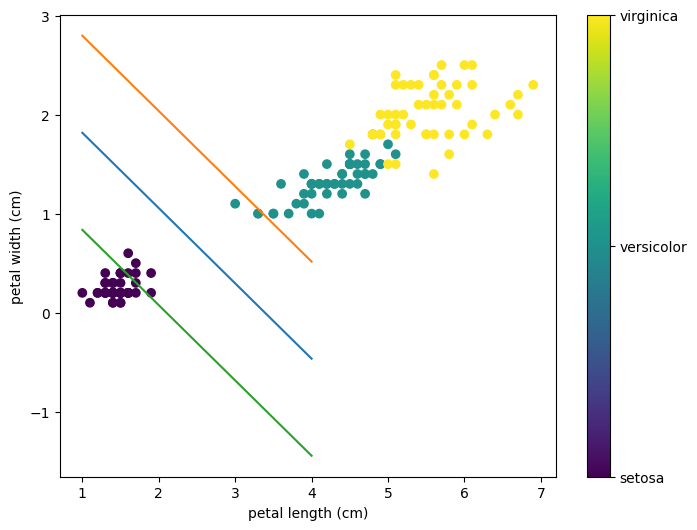

In [20]:
def line_func(x, offset):
    return   -1 * (offset - b.detach().numpy()[0] + w.detach().numpy()[0] * x ) / w.detach().numpy()[1]

x = np.array(range(1, 5))
ym = line_func(x,  0)
yp = line_func(x,  1)
yn = line_func(x, -1)

x_index = 2
y_index = 3
plt.figure(figsize=(8, 6))
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.plot(x, ym)
plt.plot(x, yp)
plt.plot(x, yn)